# Computer Vision - Convolutional Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Get data from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
import zipfile

# Unzip the data
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
# Check the structure
!dir /b pizza_steak

test
train


In [4]:
# Walk through the dir structure
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}.")

There are 2 directories and 0 files in pizza_steak.
There are 2 directories and 0 files in pizza_steak\test.
There are 0 directories and 250 files in pizza_steak\test\pizza.
There are 0 directories and 250 files in pizza_steak\test\steak.
There are 2 directories and 0 files in pizza_steak\train.
There are 0 directories and 750 files in pizza_steak\train\pizza.
There are 0 directories and 750 files in pizza_steak\train\steak.


In [5]:
# Another way to find out how many images are in the target directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [7]:
# Function to visialise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img


Image shape: (384, 512, 3)


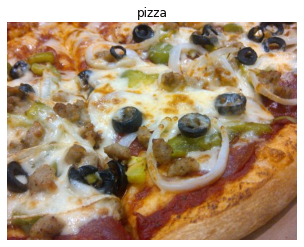

In [8]:
# Viewing random image
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [9]:
# Pre-processing image into tensor
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[120,  60,  34],
        [129,  68,  50],
        [145,  79,  81],
        ...,
        [102,  70,  57],
        [142, 108,  98],
        [162, 125, 117]],

       [[143,  82,  54],
        [156,  93,  75],
        [171, 103, 102],
        ...,
        [123,  92,  71],
        [148, 113,  94],
        [166, 131, 112]],

       [[163,  99,  71],
        [181, 116,  94],
        [190, 121, 114],
        ...,
        [152, 123,  89],
        [162, 130,  92],
        [176, 142, 104]],

       ...,

       [[112,  45,  36],
        [111,  43,  34],
        [115,  44,  38],
        ...,
        [150, 120, 120],
        [149, 119, 119],
        [148, 118, 118]],

       [[111,  48,  39],
        [104,  40,  31],
        [104,  36,  35],
        ...,
        [150, 119, 117],
        [150, 119, 117],
        [152, 121, 119]],

       [[ 97,  37,  27],
        [100,  37,  30],
        [107,  41,  42],
        ...,
        [148, 117, 11

In [10]:
# Get all the pixel values between 0 and 1
img / 255.

array([[[0.47058824, 0.23529412, 0.13333333],
        [0.50588235, 0.26666667, 0.19607843],
        [0.56862745, 0.30980392, 0.31764706],
        ...,
        [0.4       , 0.2745098 , 0.22352941],
        [0.55686275, 0.42352941, 0.38431373],
        [0.63529412, 0.49019608, 0.45882353]],

       [[0.56078431, 0.32156863, 0.21176471],
        [0.61176471, 0.36470588, 0.29411765],
        [0.67058824, 0.40392157, 0.4       ],
        ...,
        [0.48235294, 0.36078431, 0.27843137],
        [0.58039216, 0.44313725, 0.36862745],
        [0.65098039, 0.51372549, 0.43921569]],

       [[0.63921569, 0.38823529, 0.27843137],
        [0.70980392, 0.45490196, 0.36862745],
        [0.74509804, 0.4745098 , 0.44705882],
        ...,
        [0.59607843, 0.48235294, 0.34901961],
        [0.63529412, 0.50980392, 0.36078431],
        [0.69019608, 0.55686275, 0.40784314]],

       ...,

       [[0.43921569, 0.17647059, 0.14117647],
        [0.43529412, 0.16862745, 0.13333333],
        [0.45098039, 0

## Building CNN Model

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocess the data (pixels between 0 and 1), i.e. scaling/normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set path to the image directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42
)

# Building CNN model
model_cnn1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_cnn1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_cnn1 = model_cnn1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 49s 1s/step - loss: 0.6014 - accuracy: 0.7080 - val_loss: 0.4510 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 45s 950ms/step - loss: 0.4385 - accuracy: 0.8087 - val_loss: 0.3542 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 39s 827ms/step - loss: 0.3678 - accuracy: 0.8473 - val_loss: 0.5749 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 43s 902ms/step - loss: 0.3148 - accuracy: 0.8667 - val_loss: 0.3291 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 43s 902ms/step - loss: 0.2033 - accuracy: 0.9253 - val_loss: 0.4024 - val_accuracy: 0.8400


In [12]:
# Understanding the epoch steps
len(train_data)

47

In [13]:
# Number of images divided by the batch size
1500 / 32

46.875

In [14]:
# Model summary
model_cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    